In [ ]:
import os
import subprocess
import sys

# Define the environment directory
env_dir = "myenv"

# Function to run shell commands
def run_command(command):
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    if process.returncode != 0:
        raise Exception(f"Command failed with error: {stderr.decode('utf-8')}")
    return stdout.decode('utf-8')

# Remove the existing environment if it exists
if os.path.exists(env_dir):
    run_command(f"rm -rf {env_dir}")

# Create a new virtual environment
run_command(f"{sys.executable} -m venv {env_dir}")

# Activate the virtual environment
activate_script = os.path.join(env_dir, "bin", "activate")
run_command(f"source {activate_script} && pip install --upgrade pip")

# List of top 30 Python packages to install
packages = [
    "numpy", "pandas", "matplotlib", "seaborn", "scipy", "scikit-learn",
    "tensorflow", "keras", "torch", "jupyter", "jupyterlab", "notebook",
    "ipykernel", "jupyter-book", "requests", "flask", "django", "beautifulsoup4",
    "scrapy", "nltk", "spacy", "pillow", "opencv-python", "plotly", "bokeh",
    "sqlalchemy", "pydantic", "pytest", "coverage", "sphinx"
]

# Install the packages
run_command(f"source {activate_script} && pip install " + " ".join(packages))

# Install IRkernel for R
run_command(f"source {activate_script} && Rscript -e \"install.packages('IRkernel', repos='https://cloud.r-project.org/')\"")
run_command(f"source {activate_script} && Rscript -e \"IRkernel::installspec(name = 'ir', displayname = 'R')\"")

# Install Stata kernel
run_command(f"source {activate_script} && pip install stata_kernel")
run_command(f"source {activate_script} && python -m stata_kernel.install")

print("Environment setup complete.")

In [5]:
# Import statements for commonly used packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import tensorflow as tf
import keras
import torch

print("All packages imported successfully.")


All packages imported successfully.


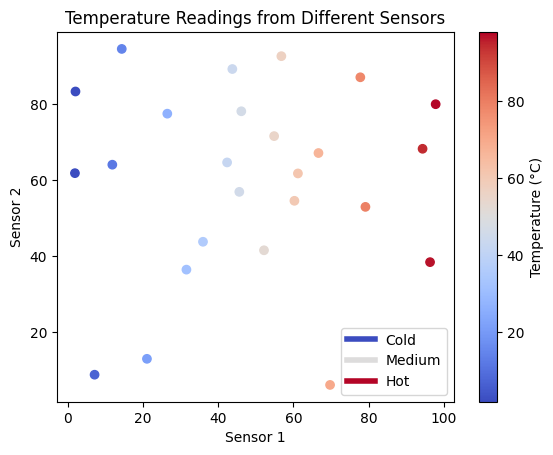

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

# Example data: temperature readings from different sensors over time
N = 10
np.random.seed(0)
data = np.random.rand(25, 2) * 100  # Simulate temperature data (0 to 100 degrees)

# Create a colormap
cmap = plt.cm.coolwarm

# Setting the color cycle
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))

# Plotting the data
fig, ax = plt.subplots()
scatter = ax.scatter(data[:, 0], data[:, 1], c=data[:, 0], cmap=cmap)

# Custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot'])

# Adding color bar for better interpretation
cbar = plt.colorbar(scatter)
cbar.set_label('Temperature (°C)')

plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Temperature Readings from Different Sensors')
plt.show()


There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)